## Checking spike field coherence with place cell data
I should also compare against the phase-based spike field coherence from Cohen

In [61]:
# import libraries
import scipy.io as sio
from pylab import *
rcParams['figure.figsize']=(12,3)                   # Change the default figure size
import matplotlib.pyplot as plt

Load in signal data and get data into formats that we can work with. We also need to define the dt variable to get time offset between samples

In [63]:
# load and extract data
data       = sio.loadmat('spikefieldData.mat')
srate      = data["srate"][0][0]
lfp        = data["lfp"][0,:]
spikeTimes = data["spikeTimes"][0,:]

# create a time variable
t = np.linspace(0,len(spikeTimes)/srate,len(spikeTimes))

# get time offset between samples (sampling interval)
dt = t[1]-t[0]

plot example signal

Text(0, 0.5, 'Voltage')

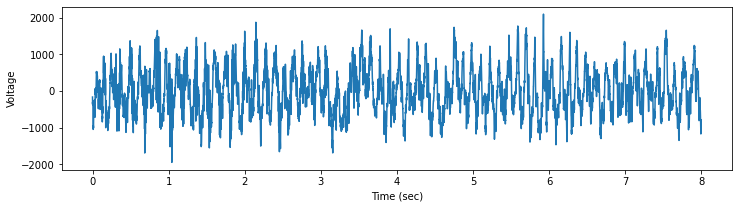

In [68]:
plt.plot(t[0:10000],lfp[0:10000])
xlabel("Time (sec)")
ylabel("Voltage")

#### Design spike field coherence algorithm

[1. 1. 1. ... 1. 1. 1.]


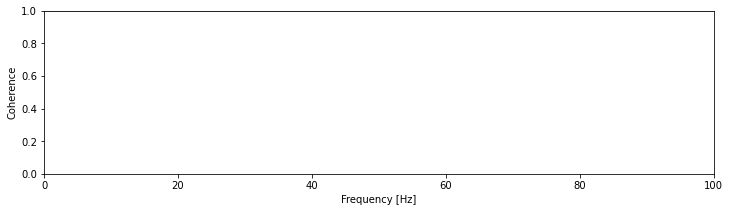

In [91]:
def get_spikeFieldCoherence(lfp,spikeTimes):
    N = shape(lfp)[0]                                     # ... and the number of data points in each trial,
    K = 1

    SYY = zeros(int(N/2+1))                             # Variable to store field spectrum.
    SNN = zeros(int(N/2+1))                             # Variable to store spike spectrum.
    SYN = zeros(int(N/2+1), dtype=complex)              # Variable to store cross spectrum.
    yf = rfft((lfp-mean(lfp)) *hanning(N))              # Hanning taper the field,
    nf = rfft(spikeTimes-mean(spikeTimes))

    SYY = (abs( real( yf*conj(yf) ) ))**2           # Field spectrum
    SNN = (abs( real( nf*conj(nf) ) ))**2          # Spike spectrum
    SYN = (abs( yf*conj(nf) ))**2                 # Cross spectrum

    cohr = abs(SYN) / sqrt(SYY) / sqrt(SNN)             # Spike-field coherence
    f = rfftfreq(N, dt)                                 # Frequency axis for plotting

    plot(f,cohr)                                        # Plot the result.
    xlim([0, 100])
    ylim([0, 1])
    xlabel('Frequency [Hz]')
    ylabel('Coherence');
    
    return cohr

coh = get_spikeFieldCoherence(lfp,spikeTimes)
print(coh)

### A different approach

In [90]:
import numpy as np
xx = np.fft.fft(lfp)/N
yy = np.fft.fft(spikeTimes)/N

# field spectrum
XX = abs(real(xx*conj(xx)))
YY = abs(real(yy*conj(yy)))
XY = xx.conj()*yy

coh = abs(XY)/sqrt(XX)/sqrt(YY)
print(coh)

[1. 1. 1. ... 1. 1. 1.]


Try welch's method

(1.0, 20.0)

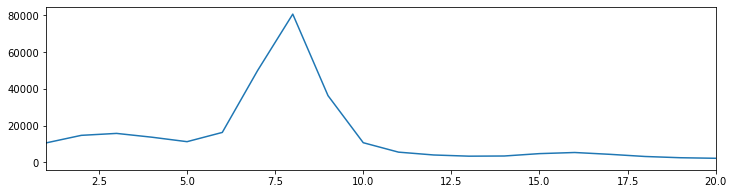

In [100]:
# power spectrum
from scipy.signal import welch
f,Ptemp = welch(lfp,srate.astype(float),window = 'hann',nperseg=srate)
plt.plot(f,Ptemp)
xlim(1, 20)

(1.0, 20.0)

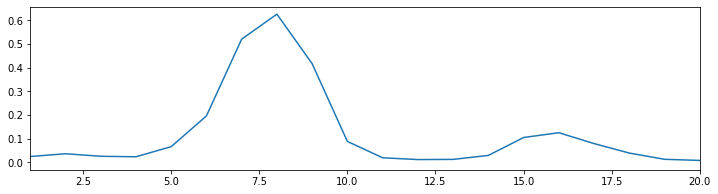

In [104]:
# cpsd
from scipy.signal import csd
f,S1  = welch(lfp,srate.astype(float),window='hann',nperseg=srate)
f,S2  = welch(spikeTimes,srate.astype(float),window='hann',nperseg=srate)
f,S12 = csd(lfp,spikeTimes,srate.astype(float),window='hann',nperseg=srate)
c = (abs(S12)**2)/(S1*S2)
plt.plot(f,c)
xlim(1,20)

Wrap into a function now

In [107]:
def spikeFieldCoherence(lfp,spikeTimes,srate):
    from scipy.signal import welch, csd
    #from scipy.signal import csd
    f,S1  = welch(lfp,srate.astype(float),window='hann',nperseg=srate)
    f,S2  = welch(spikeTimes,srate.astype(float),window='hann',nperseg=srate)
    f,S12 = csd(lfp,spikeTimes,srate.astype(float),window='hann',nperseg=srate)
    c = (abs(S12)**2)/(S1*S2)
    plt.plot(f,c)
    xlim(1,20)
    return c

array([1.11898379e-02, 2.47569159e-02, 3.64704579e-02, 2.58306209e-02,
       2.36881748e-02, 6.63043633e-02, 1.95953324e-01, 5.20114958e-01,
       6.25756264e-01, 4.16570187e-01, 8.84757638e-02, 1.95085313e-02,
       1.18948026e-02, 1.26484064e-02, 2.93600801e-02, 1.05029948e-01,
       1.25263616e-01, 7.93529674e-02, 3.93615812e-02, 1.30597521e-02,
       7.95351434e-03, 3.56957456e-03, 2.34526116e-03, 3.96291073e-03,
       2.73171579e-03, 6.31783810e-03, 6.02376601e-03, 3.25076957e-03,
       3.83908045e-03, 6.93836669e-03, 8.31180438e-03, 8.06455966e-03,
       6.31848536e-03, 5.73118869e-03, 6.54172199e-03, 1.12721957e-02,
       4.95423377e-03, 5.52430376e-03, 1.31019787e-03, 1.06581848e-03,
       1.20578764e-03, 2.27598962e-03, 1.92138110e-03, 7.38476694e-04,
       7.56677706e-04, 9.14895732e-04, 2.22338899e-03, 3.79494112e-03,
       2.04052869e-03, 2.34596408e-03, 2.17772019e-03, 1.41732022e-03,
       2.13323720e-03, 2.31393869e-03, 7.17372634e-04, 8.40471184e-04,
      

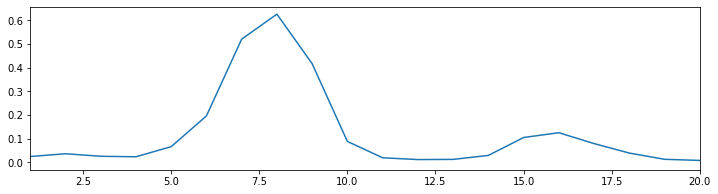

In [108]:
spikeFieldCoherence(lfp,spikeTimes,srate)